### #4
Kaggle competition: https://www.kaggle.com/competitions/playground-series-s5e3

Entry by Robin P.M. Kras

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')

In [3]:
print(train.shape, test.shape)

(2190, 13) (730, 12)


### Preprocessing

In [4]:
# removing potential whitespace
train.columns = train.columns.str.strip()
test.columns = test.columns.str.strip()

In [5]:
print(f"Train set, null count: \n{train.isnull().sum()}")
print("\n")
print(f"Test set, null count: \n{test.isnull().sum()}")

Train set, null count: 
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64


Test set, null count: 
id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64


In [6]:
# Test set contains an instance of null
test = test.fillna(0)
# If wind direction is equal to null, it must mean that there was no wind. Since there is a singular instance of null, this simple approach will be suitable

Some feature engineering on variables that likely are related or have an effect on each other. Found in someone else's submission ;)

In [7]:
train['humidity_cloud_interaction'] = train['humidity'] * train['cloud']
train['humidity_sunshine_interaction'] = train['humidity'] * train['sunshine']
train['cloud_sunshine_ratio'] = train['cloud'] / (train['sunshine'] + 1e-5)
train['relative_dryness'] = 100 - train['humidity']
train['sunshine_percentage'] = train['sunshine'] / (train['sunshine'] + train['cloud'] + 1e-5)
train['weather_index'] = (0.4 * train['humidity']) + (0.3 * train['cloud']) - (0.3 * train['sunshine'])

test['humidity_cloud_interaction'] = test['humidity'] * test['cloud']
test['humidity_sunshine_interaction'] = test['humidity'] * test['sunshine']
test['cloud_sunshine_ratio'] = test['cloud'] / (test['sunshine'] + 1e-5)
test['relative_dryness'] = 100 - test['humidity']
test['sunshine_percentage'] = test['sunshine'] / (test['sunshine'] + test['cloud'] + 1e-5)
test['weather_index'] = (0.4 * test['humidity']) + (0.3 * test['cloud']) - (0.3 * test['sunshine'])

### Model Selection

In [8]:
from sklearn.linear_model import Ridge

X = train.drop(columns=['rainfall'], errors='ignore')
y = train['rainfall']

X_test = pd.get_dummies(test)

model = Ridge()
model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'id': test.id, 'rainfall': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


c:\Users\robkr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.6643e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


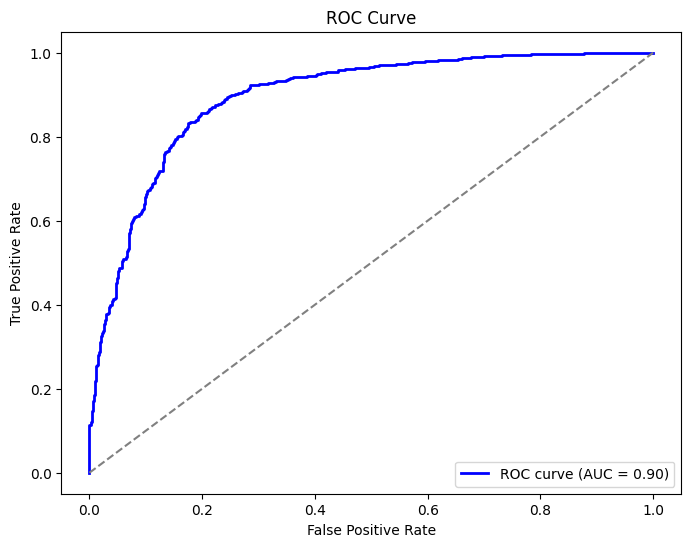

AUC Score: 0.8951


In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y, model.predict(X))  # Use training data predictions
auc_score = roc_auc_score(y, model.predict(X))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc_score:.4f}")

Results are not bad. 